In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from scipy import interpolate

In [ ]:
def f(x):
    return np.exp((np.cos(np.pi*x)+1)**2)

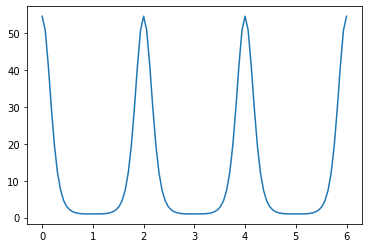

In [ ]:
x=np.linspace (0,6,100)
n=np.linspace (0,6,15)
print(plt.plot(x,f(x)))

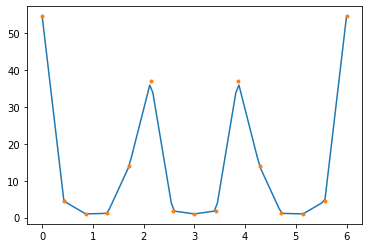

In [ ]:
spline=interpolate.interp1d(n,f(n))
print(plt.plot(x,spline(x)))
print(plt.plot(n,spline(n),'.'))

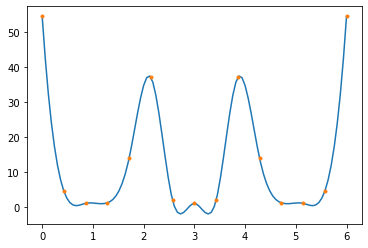

In [ ]:
spline_cubico=interpolate.interp1d(n,f(n),'cubic')
print(plt.plot(x,spline_cubico(x)))
print(plt.plot(n,spline_cubico(n),'.'))

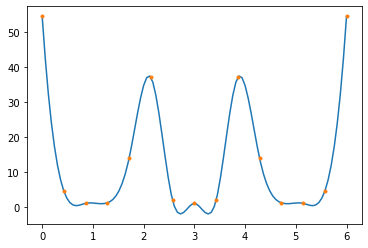

In [ ]:
spline_cubico_v2=interpolate.CubicSpline(n,f(n))
print(plt.plot(x,spline_cubico_v2(x)))
print(plt.plot(n,spline_cubico_v2(n),'.'))

In [ ]:
spline_cubico_clamped=interpolate.CubicSpline(n,f(n),bc_type='clamped')
spline_cubico_periodic=interpolate.CubicSpline(n,f(n),bc_type='periodic')
spline_cubico_natural=interpolate.CubicSpline(n,f(n),bc_type='natural')

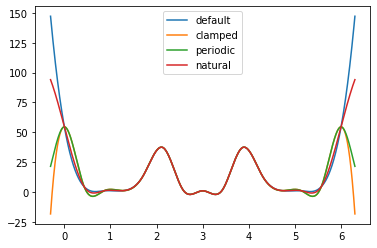

In [ ]:
z=np.linspace(-0.3,6.3,1000)
print(plt.plot(z,spline_cubico_v2(z),label='default'))
print(plt.plot(z,spline_cubico_clamped(z),label='clamped'))
print(plt.plot(z,spline_cubico_periodic(z),label='periodic'))
print(plt.plot(z,spline_cubico_natural(z),label='natural'))
plt.legend()

In [ ]:
#interpolar con nodos de tchebyshev

In [ ]:
def nodosDeTche(nronodos,inicio,fin):
    n=nronodos-1
    lista_de_nodos=[]
    for j in range(n):
        x=((fin-inicio)/2)*np.cos((2*j+1)*np.pi/(2*nronodos))+(fin+inicio)/2
        lista_de_nodos.append(x)
    return np.array(lista_de_nodos)

In [ ]:
nodos=nodosDeTche(10,0,6)
print(nodos)

[5.96306502 5.67301957 5.12132034 4.3619715  3.4693034  2.5306966
 1.6380285  0.87867966 0.32698043]


In [ ]:
y=f(nodos)
coefPoliTche=np.polyfit(nodos,f(nodos),9)
poliTche=np.poly1d(coefPoliTche)

/opt/miniconda3/envs/mat2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


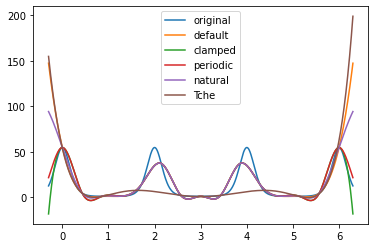

In [ ]:
z=np.linspace(-0.3,6.3,1000)
print(plt.plot(z,f(z),label='original'))
#print(plt.plot(z,spline(z),label='lineal'))
print(plt.plot(z,spline_cubico_v2(z),label='default'))
print(plt.plot(z,spline_cubico_clamped(z),label='clamped'))
print(plt.plot(z,spline_cubico_periodic(z),label='periodic'))
print(plt.plot(z,spline_cubico_natural(z),label='natural'))
print(plt.plot(z,poliTche(z),label='Tche'))
plt.legend()